# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# write your code here
data = pd.read_csv(r'/content/drive/MyDrive/AAIC Assignments/performance metrics/5_a.csv')
data.head()

y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199

In [31]:
data.shape

(10100, 2)

In [32]:
#imbalance dataset check
data['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [33]:
def predclass(y_score):
  if y_score <= 0.5:
    return 0
  else:
    return 1

In [34]:
data['y_pred']= data['proba'].apply(predclass)
data.head()

y     proba  y_pred
0  1.0  0.637387       1
1  1.0  0.635165       1
2  1.0  0.766586       1
3  1.0  0.724564       1
4  1.0  0.889199       1

In [35]:
TN = data['y'][(data['y'] == 0.0) & (data['y_pred'] == 0)].count()
FN = data['y'][(data['y'] == 1.0) & (data['y_pred'] == 0)].count()
FP = data['y'][(data['y'] == 0.0) & (data['y_pred'] == 1)].count()
TP = data['y'][(data['y'] == 1.0) & (data['y_pred'] == 1)].count()

#confusion Matrix
confusion_matrix = np.array([[TN,FN],[FP,TP]])
print("************confusion_matrix***********")
print(confusion_matrix)

#F1 score
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*precision*recall/(precision+recall)
print("************F1-Score***********")
print(F1_Score)

#Accuracy
accuracy = (TP+TN)/(TP+FP+TN+FN)
print("************Accuracy***********")
print(accuracy)

#AUC Score
data_df = data[['y','proba']]
data_df = data_df.sort_values(by = 'proba')
TPRarray = list()
FPRarray = list()
count = 0
countvalues = len(data_df['proba'].unique())
while (count < countvalues):
  col = 'y_pred_' + str(count)
  data_df[col] = data_df['proba'].apply(lambda x: 0 if x < data_df['proba'].iloc[count] else 1 )
  TN = data_df['y'][(data_df['y'] == 0.0) & (data_df[col] == 0)].count()
  FN = data_df['y'][(data_df['y'] == 1.0) & (data_df[col] == 0)].count()
  FP = data_df['y'][(data_df['y'] == 0.0) & (data_df[col] == 1)].count()
  TP = data_df['y'][(data_df['y'] == 1.0) & (data_df[col] == 1)].count()
  TPR = TP/(TP+FN)
  FPR = FP/(FP+TN)
  TPRarray.append(TPR)
  FPRarray.append(FPR)
  data_df = data_df.drop(columns= [col])
  count += 1

AUC_Score = np.trapz(sorted(TPRarray),sorted(FPRarray))
print("************AUC_Score***********")
print(AUC_Score)

************confusion_matrix***********
[[    0     0]
 [  100 10000]]
************F1-Score***********
0.9950248756218906
************Accuracy***********
0.9900990099009901
************AUC_Score***********
0.48829900000000004


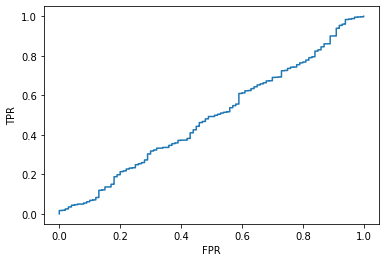

In [36]:
import matplotlib.pyplot as plt
plt.plot(sorted(FPRarray),sorted(TPRarray))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [22]:
data = pd.read_csv(r'/content/drive/MyDrive/AAIC Assignments/performance metrics/5_b.csv')
data.head()

y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648

In [23]:
data.shape

(10100, 2)

In [24]:
#imbalance dataset check
data['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [25]:
def predclass(y_score):
  if y_score <= 0.5:
    return 0
  else:
    return 1

In [26]:
data['y_pred']= data['proba'].apply(predclass)
data.head()

y     proba  y_pred
0  0.0  0.281035       0
1  0.0  0.465152       0
2  0.0  0.352793       0
3  0.0  0.157818       0
4  0.0  0.276648       0

In [27]:
TN = data['y'][(data['y'] == 0.0) & (data['y_pred'] == 0)].count()
FN = data['y'][(data['y'] == 1.0) & (data['y_pred'] == 0)].count()
FP = data['y'][(data['y'] == 0.0) & (data['y_pred'] == 1)].count()
TP = data['y'][(data['y'] == 1.0) & (data['y_pred'] == 1)].count()

#confusion Matrix
confusion_matrix = np.array([[TN,FN],[FP,TP]])
print("************confusion_matrix***********")
print(confusion_matrix)

#F1 score
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*precision*recall/(precision+recall)
print("************F1-Score***********")
print(F1_Score)

#Accuracy
accuracy = (TP+TN)/(TP+FP+TN+FN)
print("************Accuracy***********")
print(accuracy)

#AUC Score
data_df = data[['y','proba']]
data_df = data_df.sort_values(by = 'proba')
TPRarray = list()
FPRarray = list()
count = 0
countvalues = len(data_df['proba'].unique())
while (count < countvalues):
  col = 'y_pred_' + str(count)
  data_df[col] = data_df['proba'].apply(lambda x: 0 if x < data_df['proba'].iloc[count] else 1 )
  TN = data_df['y'][(data_df['y'] == 0.0) & (data_df[col] == 0)].count()
  FN = data_df['y'][(data_df['y'] == 1.0) & (data_df[col] == 0)].count()
  FP = data_df['y'][(data_df['y'] == 0.0) & (data_df[col] == 1)].count()
  TP = data_df['y'][(data_df['y'] == 1.0) & (data_df[col] == 1)].count()
  TPR = TP/(TP+FN)
  FPR = FP/(FP+TN)
  TPRarray.append(TPR)
  FPRarray.append(FPR)
  data_df = data_df.drop(columns= [col])
  count += 1

AUC_Score = np.trapz(sorted(TPRarray),sorted(FPRarray))
print("************AUC_Score***********")
print(AUC_Score)

************confusion_matrix***********
[[9761   45]
 [ 239   55]]
************F1-Score***********
0.2791878172588833
************Accuracy***********
0.9718811881188119
************AUC_Score***********
0.9377570000000001


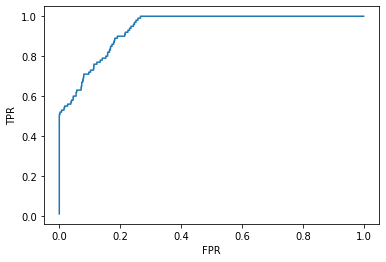

In [29]:
import matplotlib.pyplot as plt
plt.plot(sorted(FPRarray),sorted(TPRarray))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/AAIC Assignments/performance metrics/5_c.csv')
data.head()

y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579

In [ ]:
data.shape

(2852, 2)

In [ ]:
data['y'].value_counts()

0    1805
1    1047
Name: y, dtype: int64

In [ ]:
#Best Threshold
data_df = data[['y','prob']]
data_df = data_df.sort_values(by = 'prob')
Treshold_dict = dict()
count = 0
countvalues = len(data_df['prob'].unique())
while (count < countvalues):
  col = 'y_pred_' + str(count)
  prob = sorted(data_df['prob'].unique())[count]
  data_df[col] = data_df['prob'].apply(lambda x: 0 if x < prob else 1 )
  FN = data_df['y'][(data_df['y'] == 1.0) & (data_df[col] == 0)].count()
  FP = data_df['y'][(data_df['y'] == 0.0) & (data_df[col] == 1)].count()
  A=(500*FN)+(100*FP)
  Treshold_dict[A] = prob
  data_df = data_df.drop(columns= [col])
  count += 1

print("************Best Threshold***********")
key = sorted(Treshold_dict.keys())[0]
Best_Threshold = Treshold_dict[key]
print(Best_Threshold)

************Best Threshold***********
0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/AAIC Assignments/performance metrics/5_d.csv')
data.head()

y   pred
0  101.0  100.0
1  120.0  100.0
2  131.0  113.0
3  164.0  125.0
4  154.0  152.0

In [ ]:
data.shape

(157200, 2)

In [ ]:
#Mean Square Error
y_mean = data['y'].mean()
data['mean_square'] = data['y'].apply(lambda y: pow((y-y_mean),2))
data['residue'] = pow((data['y'] - data['pred']),2)
print("************Mean Square Error***********")
mse = data['residue'].sum()/data.shape[0]
print(mse)
#MAPE
print("************MAPE***********")
data['abs_residue'] = abs(data['y'] - data['pred'])
mape = data['abs_residue'].sum()/data['y'].sum()
print(round(mape,4))
#R^2 error
print("************R^2 error***********")
ssres = data['residue'].sum()
sstotal = data['mean_square'].sum()
r_square_error = 1-(ssres/sstotal)
print(round(r_square_error,4))

************Mean Square Error***********
177.16569974554707
************MAPE***********
0.1291
************R^2 error***********
0.9564
